# Programming 2
## Luis Martinez
## New York Philharmonic Data Analysis

The rise of popularrity of **data science** has led to data science techniques being applied in some unexpected places, and to the release of some very interesting datasets. There are very few areas in which data science techiques are not making a difference.

One organisation that has released some very interesting datasets is the **New York Philharmonic Orchestra**. The Open Data at the New York Philharmonic project (http://archives.nyphil.org/index.php/open-data) makes data abour performances and subscriptions at the New York Philharmonic stretching all the way back to its first performance in 1842. 

The goal of this assignment is to use data from the Philharmonic to answer questions about it's performances from 2011 to 2016. 

<img src = "files/NYPhil.jpg" width = "500">

### Question 1: Load Datasets

Details of the performances by the New York Philharmonic orchestra are contained in the files **concerts.csv**, **works.csv**, and **soloists.csv**. Each row within **concerts.csv** describes a performance, using the followiung fields:

* **ID**: The ID of the performance
* **Event_Type**: The type of the performance
* **Location**: The location of the performance
* **Venue**: The venue of the performance
* **Date**: The date of the performance, given as dd/mm/yyyy (e.g. 24/07/2014, 02/03/2012)
* **Start_Time**: The time that the performance started given as hh:mm (e.g. 17:30, 11:00)
* **End_Time**: The time that the performance ended given as hh:mm (e.g. 17:30, 11:00)
* **Duration**: The duration of the concert

Each row within **works.csv** contains details of the works performed in a particular performance, using the following fields:

* **ID**: The ID of the performance (links to the data in the concerts.csv file)
* **Orchestra**: The name of the orchestra that performed
* **ComposerName**: The name of the composer(s) whose work was performed
* **ConductorName**: The name of the conductor

Each row within **soloists.csv** contains details of the soloist(s) that performed in a particular performance, using the following fields:

* **ID**: The ID of the performance (links to the data in the concerts.csv file)
* **Soloist_Rank**: The rank of the solist within in the perfomrance (e.g. 1st, 2nd, 3rd, ...)
* **Soloist_Name**: The name of the soloist
* **Soloist_Instrument**: The instrument the soloist played

Load the three datasets (**concerts.csv**, **works.csv**, and **soloists.csv**) into pandas data frames: **concerts**, **works**, and **soloists**. Display the first five rows from each.

In [1]:
# Import useful packages for data science
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load concerts.csv
concerts = pd.read_csv('concerts.csv')
concerts.head()

,ID,Event_Type,Location,Venue,Date,Start_Time,End_Time,Duration
0,356,Very Young People's Concert,"Manhattan, NY",Merkin Concert Hall,18/03/13,22:30,23:19,49
1,626,NY Phil Biennial,"Manhattan, NY","Museum of Modern Art, The",29/05/14,22:00,23:50,110
2,641,NY Phil Biennial,"Manhattan, NY",The Stanley H. Kaplan Penthouse,04/06/14,21:30,22:31,61
3,627,NY Phil Biennial,"Manhattan, NY","Museum of Modern Art, The",31/05/14,22:00,23:10,70
4,451,Tour - Chamber,"Sao Paulo, BRAZIL",Teatro Cultura Artistica,05/09/13,21:10,23:27,137


In [3]:
# Load works.csv
works = pd.read_csv('works.csv')
works.head()

,ID,Orchestra,ComposerName,ConductorName
0,396,New York Philharmonic,"Salonen, Esa-Pekka","Gilbert, Alan"
1,295,New York Philharmonic,"Sibelius, Jean","Gersen, Joshua"
2,122,New York Philharmonic,"Brahms, Johannes","Dohnanyi, Christoph von"
3,874,New York Philharmonic,"Debussy, Claude","Gilbert, Alan"
4,755,New York Philharmonic,"Ravel, Maurice","Gilbert, Alan"


In [4]:
# Load soloists.csv
soloists = pd.read_csv('soloists.csv')
soloists.head()

,ID,Soloist_Rank,Soloist_Name,Soloist_Instrument
0,921,2,"Ward-Bergeman, Michael",Accordion
1,461,3,"Jennings, John",Accoustic Bass
2,479,3,"Jennings, John",Accoustic Bass
3,496,3,"Jennings, John",Accoustic Bass
4,517,3,"Jennings, John",Accoustic Bass


### Question 2: Simple Analysis

Use simple data analysis to answer the following questions. 

**a)** Generate and print a table showing many times have works been performed by each composer in the dataset?

In [5]:
works["ComposerName"].value_counts()

Tchaikovsky, Pyotr Ilyich                57
Beethoven, Ludwig van                    46
Mozart, Wolfgang Amadeus                 42
Prokofiev, Sergei                        41
Bernstein, Leonard                       36
                                         ..
Isham, Mark                               1
Fernandez [FernÌ¢ndez], Oscar Lorenzo     1
Mingus, Charles                           1
Dukas, Paul                               1
Poulenc, Francis                          1
Name: ComposerName, Length: 204, dtype: int64

**b)** In how many different locations have there been concerts?

In [6]:
# Count the number of times each location has appeared in the concerts dataset, and print the number of locations
len(set(concerts["Location"]))


47

**c)** How many times has there been a concert in Cologne in Germany?

In [7]:
# Count the number of times each location has appeared in the concerts dataset, and print the number of times Cologne, GERMANY has appeared
set(concerts["Location"])
len(concerts[concerts["Location"]=='Cologne, GERMANY'])

4

**d)** How many times has the Bassoon been a soloist instrument?

In [8]:
# Count the number of times each instrument has appeared in the soloists dataset, and print the number of times Bassoon appeared
set(soloists["Soloist_Instrument"])
soloists[soloists["Soloist_Instrument"]=='Bassoon']

,ID,Soloist_Rank,Soloist_Name,Soloist_Instrument
116,17,3,"LeClair, Judith",Bassoon
117,18,2,"Laskowski, Kim",Bassoon
118,19,2,"Fast, Arlen",Bassoon
119,166,1,"Laskowski, Kim",Bassoon
120,230,4,"Foster, Brent",Bassoon
121,238,2,"Fast, Arlen",Bassoon
122,250,4,"Foster, Brent",Bassoon
123,280,2,"Nye, Roger",Bassoon
124,285,2,"Nye, Roger",Bassoon
125,291,2,"Nye, Roger",Bassoon


**e)** What is the most popular soloist instrument?

In [9]:
# Count the number of times each instrument has appeared in the soloists dataset, and print the most popular instrument
soloists_instrument_count = soloists["Soloist_Instrument"].value_counts()
display(soloists_instrument_count)
print("Most popular solist instrument: " + soloists_instrument_count.keys()[0])

Violin                 456
Piano                  372
Cello                  237
Trumpet                213
Viola                  169
                      ... 
Flamenco Guitar          1
Flamenco Dancer          1
Chamber Orchestra        1
Euphonium                1
Dizi [Bamboo flute]      1
Name: Soloist_Instrument, Length: 112, dtype: int64

Most popular solist instrument: Violin


**f)** Who are the three most popular conductors?

**Bonus:** Print conductors names as first name followed by last name.

In [10]:
# Count the number of times each composer has appeared in the works dataset
concert_conductor_counts = works["ConductorName"].value_counts()

# Iterate through the top three composers
print("Top three conductors: ")
for i in range(0, 3):
    # Isolate the parts of the composers name and rearrange it
    conductor = concert_conductor_counts.keys()[i]
    conductorLast = conductor.split(",")[0]
    conductorFirst = conductor.split(",")[1]
    print(conductorFirst, conductorLast)


Top three conductors: 
 Alan Gilbert
 Joshua Gersen
 Rob Fisher


### Question 3: Deeper Analysis

Use slightly more advanced data analysis to answer the following questions.

**a)** Draw an appropriate data visualsiation that shows the number of concerts played in each location outside of Manahattan in New York?

<AxesSubplot:>

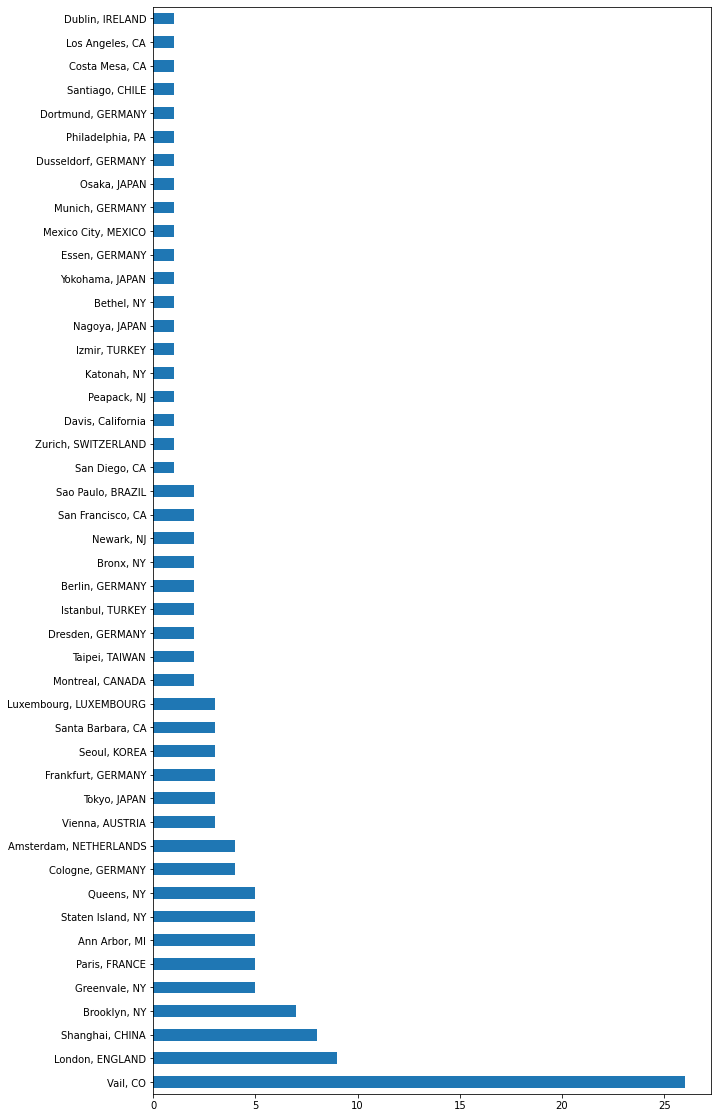

In [11]:
# Make a  histogram of durations
foreign_concerts = concerts[concerts["Location"] != "Manhattan, NY"]
concert_loc_counts = foreign_concerts["Location"].value_counts()
concert_loc_counts.plot(kind = "barh", figsize = (10,20))

**b)** How many times has there been a concert anywhere in Germany?

**Hint:** Experiment with the *str.contains* method from *pandas.Series*.

In [12]:
german_concerts = concerts[concerts["Location"].str.contains("GERMANY")]
print("Number of concerts in Germany:", len(german_concerts))

Number of concerts in Germany: 15


**c)** What is the average duration of a concert (in minutes)?

In [13]:
# Calculate the difference between the start and end times
print("Average concert duration " + str(concerts["Duration"].mean()) + " minutes")

Average concert duration 178.31422924901185 minutes


**d)** Draw an appropriate data visualisation to show the distribution of concert durations.

Text(0.5, 0, 'Duration (minutes)')

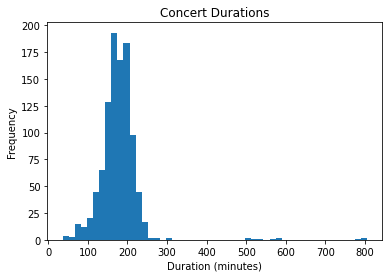

In [14]:
# Make a  histogram of durations
concerts["Duration"].plot(kind="hist", bins=50, title = "Concert Durations")
plt.xlabel("Duration (minutes)")

**e)** Are performances of works by Tchaikovsky of longer duration, on average, than performances of works by Beethoven? 

**Bonus:** Can you plot a data visualisation to support this conclusion?

In [15]:
import pandas as pd

# Join the works and concerts tables
concerts_with_works = pd.merge(concerts, works, on="ID", how = 'outer')
concerts_with_works.head()

,ID,Event_Type,Location,Venue,Date,Start_Time,End_Time,Duration,Orchestra,ComposerName,ConductorName
0,356,Very Young People's Concert,"Manhattan, NY",Merkin Concert Hall,18/03/13,22:30,23:19,49,New York Philharmonic,"Grafe, Max","Gilbert, Alan"
1,626,NY Phil Biennial,"Manhattan, NY","Museum of Modern Art, The",29/05/14,22:00,23:50,110,New York Philharmonic,"Tchaikovsky, Pyotr Ilyich","Gilbert, Alan"
2,641,NY Phil Biennial,"Manhattan, NY",The Stanley H. Kaplan Penthouse,04/06/14,21:30,22:31,61,New York Philharmonic,"Tchaikovsky, Pyotr Ilyich","Gilbert, Alan"
3,627,NY Phil Biennial,"Manhattan, NY","Museum of Modern Art, The",31/05/14,22:00,23:10,70,NY Philharmonic Ensembles,"Tchaikovsky, Pyotr Ilyich","Gilbert, Alan"
4,451,Tour - Chamber,"Sao Paulo, BRAZIL",Teatro Cultura Artistica,05/09/13,21:10,23:27,137,New York Philharmonic,"Strauss, Richard","Gilbert, Alan"


In [16]:
# Extract concerts by Tchaikovsky and calculate their mean duration
concerts_with_works_tchaikovsky = concerts_with_works[concerts_with_works["ComposerName"] == "Tchaikovsky, Pyotr Ilyich"]
print("Tchaikovsky average duration: ", concerts_with_works_tchaikovsky["Duration"].mean())


Tchaikovsky average duration:  166.3684210526316


In [17]:
# Extract concerts by Beethoven and calculate their mean duration
concerts_with_works_beethoven = concerts_with_works[concerts_with_works["ComposerName"] == "Beethoven, Ludwig van"]
print("Beethoven average duration: ", concerts_with_works_beethoven["Duration"].mean())

Beethoven average duration:  172.8695652173913


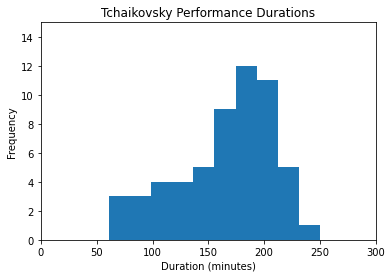

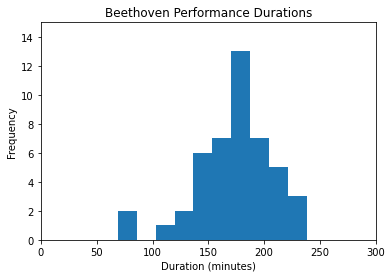

T-test p value:  0.41220547125874807


In [18]:
# Draw histrograms of Tchaikovsky and Beethoven performance durations
concerts_with_works_tchaikovsky["Duration"].plot(kind="hist", xlim = (0, 300), ylim = (0, 15), title="Tchaikovsky Performance Durations")
plt.xlabel("Duration (minutes)")
plt.show()
concerts_with_works_beethoven["Duration"].plot(kind="hist", xlim = (0, 300), ylim = (0, 15), title="Beethoven Performance Durations")
plt.xlabel("Duration (minutes)")
plt.show()

# Perform a t-test
import scipy.stats
t, p = scipy.stats.ttest_ind(concerts_with_works_tchaikovsky["Duration"], concerts_with_works_beethoven["Duration"], equal_var=False)
print("T-test p value: ", p)

**f)** What is the most popular first soloist instrument when works by George Gershwin are performed?

In [19]:
# Join the soloists and concerts tables
concerts_with_soloists = pd.merge(concerts, soloists, on="ID", how = 'outer')
concerts_with_soloists.head()

concerts_with_soloists_and_works = pd.merge(concerts_with_soloists, works, on="ID", how = 'outer')
concerts_with_soloists_and_works.head(15)

counts = concerts_with_soloists_and_works.loc[(concerts_with_soloists_and_works["ComposerName"] == "Gershwin, George") & (concerts_with_soloists_and_works["Soloist_Rank"] == 1), "Soloist_Instrument"].value_counts()
print("Most popular 1st soloist instrument for Gershwin:", counts.keys()[0])


Most popular 1st soloist instrument for Gershwin: Trombone


**g)** Which soloist has played for the longest total duration?

In [20]:
# Join the soloists and concerts tables
concerts_with_soloists = pd.merge(concerts, soloists, on="ID", how = 'outer')
concerts_with_soloists.head()

# Group the data frame by soloist name
concerts_with_soloists_grp = concerts_with_soloists.groupby("Soloist_Name")
# Aggregate performances by soloists (sum durations)
concerts_with_soloists_grp = concerts_with_soloists_grp["Duration"].sum()
# Sort aggreegated data frame in descending order
concerts_with_soloists_grp.sort_values(ascending=False, inplace = True)
# Print the top of the data frame
display(concerts_with_soloists_grp.head())
# Print the name of the most prolific soloist
print("Most prolific soloist: " + concerts_with_soloists_grp.index[0])

Soloist_Name
Staples, Sheryl    10001
Alessi, Joseph      9230
Wall, Howard        8817
Baer, Alan          8674
Bensdorf, Ethan     7964
Name: Duration, dtype: int64

Most prolific soloist: Staples, Sheryl
